# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [3]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
len(X_train)

73196

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
feature_list=[] # To hold the feature names for set 1 

[]

In [7]:
feature_list2=[] # To hold the feature names for set 2

In [8]:
#Bow Vectorizer for encoding essay
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
vectorizer.fit(X_train['essay'].values)
feature_list.extend(vectorizer.get_feature_names())
train_bow_essay = vectorizer.transform(X_train['essay'].values)
test_bow_essay = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(train_bow_essay.shape, y_train.shape)
print(test_bow_essay.shape,y_test.shape)


After vectorizations
(73196, 10000) (73196,)
(36052, 10000) (36052,)


In [11]:
#TFIDF Vectorizer for encoding essay
from sklearn.feature_extraction.text import TfidfVectorizer
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
vectorizer.fit(X_train['essay'].values)
feature_list2.extend(vectorizer.get_feature_names())
train_tfidf_essay = vectorizer.transform(X_train['essay'].values)
test_tfidf_essay = vectorizer.transform(X_test['essay'].values)

print("After vectorization")
print(train_tfidf_essay.shape, y_train.shape)
print(test_tfidf_essay.shape,y_test.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)
After vectorization
(73196, 10000) (73196,)
(36052, 10000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [13]:

#Encoding school state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
feature_list.extend(vectorizer.get_feature_names())
feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)


After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [14]:
#Encoding teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
feature_list.extend(vectorizer.get_feature_names())
feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [15]:
#Encoding project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
feature_list.extend(vectorizer.get_feature_names())
feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [16]:
#Encoding categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)

X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_cat_ohe.shape, y_train.shape)
print(X_test_cat_ohe.shape, y_test.shape)
feature_list.extend(vectorizer.get_feature_names())
feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [17]:
#Encoding cleam sub_categories
#Encoding categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_ohe = vectorizer.transform(X_train['clean_categories'].values)

X_test_sub_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_sub_ohe.shape, y_train.shape)
print(X_test_sub_ohe.shape, y_test.shape)
feature_list.extend(vectorizer.get_feature_names())
feature_list2.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [18]:
#Encoding numercial features- price
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

x_train_price_std = normalizer.transform(X_train['price'].values.reshape(1,-1))
x_test_price_std = normalizer.transform(X_test['price'].values.reshape(1,-1))

x_train_price_std = x_train_price_std.reshape(-1,1)
x_test_price_std = x_test_price_std.reshape(-1,1)

print('After vectorization:...')
print(x_train_price_std.shape,y_train.shape)
print(x_test_price_std.shape,y_test.shape)
feature_list.append('price')
feature_list2.append('price')
print("="*100)
print(x_train_price_std)

After vectorization:...
(73196, 1) (73196,)
(36052, 1) (36052,)
[[4.62594124e-03]
 [1.64672513e-03]
 [3.03851298e-03]
 ...
 [5.67506388e-03]
 [2.84577852e-03]
 [5.99251811e-05]]


In [19]:
#Encoding  teacher_number_of_previously_posted_projects
data.head(1)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_nppp_std = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_nppp_std = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

x_train_nppp_std = x_train_nppp_std.reshape(-1,1)
x_test_nppp_std = x_test_nppp_std.reshape(-1,1)

print('After vectorization:...')
print(x_test_nppp_std.shape,y_train.shape)
print(x_test_nppp_std.shape,y_test.shape)
feature_list.append('teacher_number_of_previously_posted_projects')
feature_list2.append('teacher_number_of_previously_posted_projects')
print("="*100)

After vectorization:...
(36052, 1) (73196,)
(36052, 1) (36052,)


In [21]:
#Concatenating all features
from scipy.sparse import hstack

#Set 1: categorical, numerical features + preprocessed_eassay (BOW)
X_tr1 = hstack((train_bow_essay,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe,x_train_price_std,x_train_nppp_std)).tocsr()
X_te1 = hstack((test_bow_essay,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe,x_test_price_std,x_test_nppp_std)).tocsr()

#Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)
X_tr2 = hstack((train_tfidf_essay,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_cat_ohe,X_train_sub_ohe,x_train_price_std,x_train_nppp_std)).tocsr()
X_te2 = hstack((test_tfidf_essay,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_cat_ohe,X_test_sub_ohe,x_test_price_std,x_test_nppp_std)).tocsr()


print("Set 1:")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)
print('Set 2 ')
print(X_tr2.shape, y_train.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 10101) (73196,)
(36052, 10101) (36052,)
Set 2 
(73196, 10101) (73196,)
(36052, 10101) (36052,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [104]:

#Using randomsearchCV to find the best hyperparmaters for the feature set 1 
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
model = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,1000,10000]}

clf = RandomizedSearchCV(model,parameters,cv=3,scoring='roc_auc',return_train_score=True)
result=clf.fit(X_tr1,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)



In [105]:
#Best alpha value
result.best_params_

{'alpha': 1e-05}

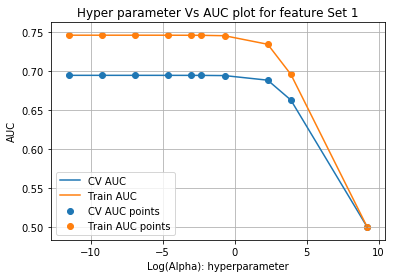

In [106]:
import numpy as np
results = results.sort_values(['param_alpha'],ascending=True)
cv_auc = results['mean_test_score']
train_auc= results['mean_train_score']
alpha = results['param_alpha']

plt.plot(np.log(alpha.astype('float64')), cv_auc, label='CV AUC')
plt.plot(np.log(alpha.astype('float64')), train_auc, label='Train AUC')

plt.scatter(np.log(alpha.astype('float64')), cv_auc, label='CV AUC points')
plt.scatter(np.log(alpha.astype('float64')), train_auc, label='Train AUC points')

plt.legend()
plt.xlabel("Log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot for feature Set 1")
plt.grid()
plt.show()

In [25]:

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

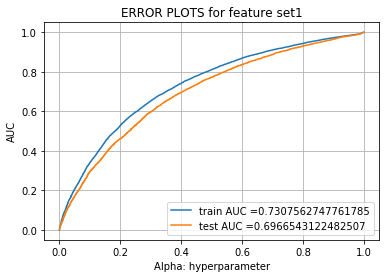

In [107]:
best_alpha = 1e-05
#After finding the best hyperparameter, we use that alpha to train the model and test its performacnce using test AUC score

from sklearn.metrics import roc_curve, auc
model = MultinomialNB(alpha=best_alpha)
model.fit(X_tr1,y_train)

y_train_pred = batch_predict(model,X_tr1)
y_test_pred = batch_predict(model,X_te1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS for feature set1")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.4584764572782354 for threshold 0.847
Test confusion matrix
[[ 3416  2043]
 [ 9974 20619]]


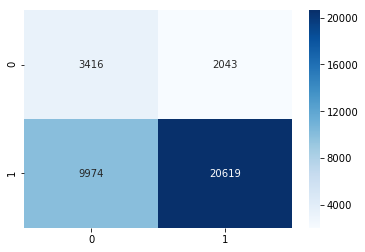

In [108]:
#Printing the confusion matrix with heatmap enabled -row = actual and column = predicted samples
# 0=negative and 1=positive
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test confusion matrix")
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

print(cm)

import seaborn as sns

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues');

In [109]:
#Finding the top 20 features for positive examples based on log prob_scores
probs=model.feature_log_prob_[1]
indices = probs.argsort()[::-1][:len(probs)]
top_20=[]
for i in range(20):
    top_20.append(feature_list[indices[i]])
print('Top 20 features for feature set 1 :')
print(top_20)

Top 20 features for feature set 1 :
['students', 'school', 'my', 'learning', 'classroom', 'the', 'not', 'they', 'my students', 'learn', 'help', 'many', 'nannan', 'we', 'need', 'work', 'reading', 'use', 'love', 'day']


In [110]:
#Finding the top 20 features for negative examples based on log prob_scores
probs=model.feature_log_prob_[0]
indices = probs.argsort()[::-1][:len(probs)]
top_20=[]
for i in range(20):
    top_20.append(feature_list[indices[i]])
print('Top 20 features for feature set 1 negative examples:')
print(top_20)

Top 20 features for feature set 1 negative examples:
['students', 'school', 'learning', 'my', 'classroom', 'not', 'learn', 'they', 'help', 'the', 'my students', 'nannan', 'many', 'we', 'need', 'work', 'come', 'love', 'reading', 'skills']


In [117]:
#Using randomsearchCV to find the best hyperparmaters for the feature set 2 
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm
model = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100,1000,10000]}

clf2 = RandomizedSearchCV(model,parameters,cv=3,scoring='roc_auc',return_train_score=True)
result2=clf.fit(X_tr2,y_train)

results2 = pd.DataFrame.from_dict(clf.cv_results_)


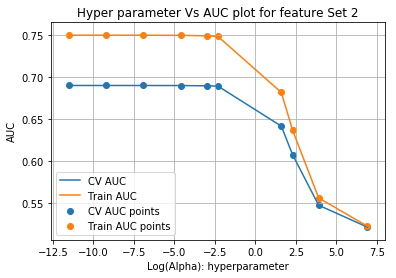

In [118]:
import numpy as np
results2 = results2.sort_values(['param_alpha'],ascending=True)
cv_auc = results2['mean_test_score']
train_auc= results2['mean_train_score']
alpha = results2['param_alpha']

plt.plot(np.log(alpha.astype('float64')), cv_auc, label='CV AUC')
plt.plot(np.log(alpha.astype('float64')), train_auc, label='Train AUC')

plt.scatter(np.log(alpha.astype('float64')), cv_auc, label='CV AUC points')
plt.scatter(np.log(alpha.astype('float64')), train_auc, label='Train AUC points')

plt.legend()
plt.xlabel("Log(Alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot for feature Set 2")
plt.grid()
plt.show()

In [119]:
result2.best_params_

{'alpha': 1e-05}

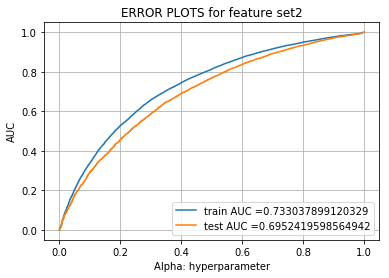

In [120]:
best_alpha2=1e-05
#After finding the best hyperparameter, we use that alpha to train the model and test its performacnce using test AUC score
from sklearn.metrics import roc_curve, auc
model2 = MultinomialNB(alpha=best_alpha2)
model2.fit(X_tr2,y_train)

y_train_pred = batch_predict(model2,X_tr2)
y_test_pred = batch_predict(model2,X_te2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS for feature set2")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.46048787979496386 for threshold 0.85
Test confusion matrix
[[ 3474  1985]
 [10481 20112]]


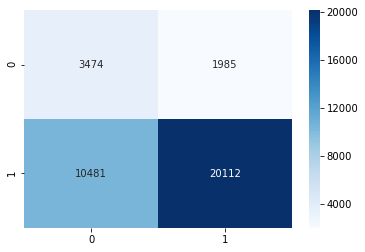

In [121]:
#Printing the confusion matrix with heatmap enabled -row = actual and column = predicted samples
# 0=negative and 1=positive
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Test confusion matrix")
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

print(cm)

import seaborn as sns

sns.heatmap(cm, annot=True,fmt="d",cmap='Blues');


In [122]:
#Finding the top 20 features for positive examples based on log prob_scores
model2.feature_log_prob_[1]
pb = model2.feature_log_prob_[1]
indices = pb.argsort()[::-1][:len(pb)]
top_20=[]
for i in range(20):
    top_20.append(feature_list2[indices[i]])
print('Top 20 Features for set 2 positive class :')
print(top_20)

Top 20 Features for set 2 positive class :
['mrs', 'literacy_language', 'grades_prek_2', 'math_science', 'ms', 'grades_3_5', 'grades_6_8', 'ca', 'health_sports', 'specialneeds', 'specialneeds', 'appliedlearning', 'students', 'grades_9_12', 'mr', 'music_arts', 'ny', 'tx', 'fl', 'history_civics']


In [123]:
#Finding the top 20 features for negative examples based on log prob_scores
model2.feature_log_prob_[0]
pb = model2.feature_log_prob_[0]
indices = pb.argsort()[::-1][:len(pb)]
top_20=[]
for i in range(20):
    top_20.append(feature_list2[indices[i]])
print('Top 20 Features for set 2 negative class :')
print(top_20)

Top 20 Features for set 2 negative class :
['mrs', 'literacy_language', 'grades_prek_2', 'math_science', 'ms', 'grades_3_5', 'grades_6_8', 'specialneeds', 'specialneeds', 'health_sports', 'ca', 'appliedlearning', 'grades_9_12', 'students', 'mr', 'music_arts', 'tx', 'fl', 'ny', 'history_civics']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [124]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper parameter Alpha", "AUC"]
x.add_row(["BOW","Multinominal NB",best_alpha,"0.6966"])
x.add_row(['TFIDF','Multinominal NB',best_alpha2,"0.6952"])
print('Summary:')
print(x)

Summary:
+------------+-----------------+-----------------------+--------+
| Vectorizer |      Model      | Hyper parameter Alpha |  AUC   |
+------------+-----------------+-----------------------+--------+
|    BOW     | Multinominal NB |         1e-05         | 0.6966 |
|   TFIDF    | Multinominal NB |         1e-05         | 0.6952 |
+------------+-----------------+-----------------------+--------+
